In [12]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [13]:
# Cell 2: Load and Clean Data
def load_weather_data():
    """Load and clean weather data from CSV file"""
    # Load the data
    df = pd.read_csv('weatherHistory.csv')
    print(f" Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
    
    # Display basic info
    print("\n Dataset Overview:")
    print(f"Columns: {list(df.columns)}")
    print(f"Date range: {df.iloc[0, 0] if len(df) > 0 else 'No data'} to {df.iloc[-1, 0] if len(df) > 0 else 'No data'}")
    
    return df

# Load data
df = load_weather_data()

 Data loaded: 96453 rows, 12 columns

 Dataset Overview:
Columns: ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']
Date range: 2006-04-01 00:00:00.000 +0200 to 2016-09-09 23:00:00.000 +0200


In [15]:
# Cell 3: Data Preprocessing
def clean_data(df):
    """Clean and preprocess the weather data"""
    df_clean = df.copy()
    
    # Clean column names
    df_clean.columns = [col.strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'percent') 
                       for col in df_clean.columns]
    
    # Handle date column (try different possible date column names)
    date_columns = [col for col in df_clean.columns if 'date' in col.lower() or 'time' in col.lower()]
    
    if date_columns:
        date_col = date_columns[0]
        df_clean['datetime'] = pd.to_datetime(df_clean[date_col], errors='coerce')
        
        # Only extract parts if conversion worked
        if pd.api.types.is_datetime64_any_dtype(df_clean['datetime']):
            df_clean['date'] = df_clean['datetime'].dt.date
            df_clean['hour'] = df_clean['datetime'].dt.hour
            df_clean['month'] = df_clean['datetime'].dt.month
            df_clean['year'] = df_clean['datetime'].dt.year
            df_clean['day_of_week'] = df_clean['datetime'].dt.day_name()
            print("✅ Date columns created successfully")
        else:
            print("⚠️ Date column could not be converted properly.")
    
    # Convert numeric columns
    numeric_cols = df_clean.select_dtypes(include=['object']).columns
    for col in numeric_cols:
        if col not in ['datetime', 'date', 'day_of_week']:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')
    
    # Handle missing values
    numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    print(f"Data cleaned: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
    return df_clean

# Clean the data
df_clean = clean_data(df)

# Display first few rows
print("\n📋 First 5 rows:")
df_clean.head()


⚠️ Date column could not be converted properly.
Data cleaned: 96453 rows, 13 columns

📋 First 5 rows:


,Formatted_Date,Summary,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_km/h,Wind_Bearing_degrees,Visibility_km,Loud_Cover,Pressure_millibars,Daily_Summary,datetime
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00+02:00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00+02:00
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00+02:00
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00+02:00
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00+02:00


In [16]:
# Cell 4: Basic Data Analysis
def basic_analysis(df):
    """Perform basic statistical analysis"""
    print("="*60)
    print("📊 BASIC DATA ANALYSIS")
    print("="*60)
    
    # Dataset info
    print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    # Numeric columns analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(f"\n📈 Numeric Columns ({len(numeric_cols)}):")
    
    if len(numeric_cols) > 0:
        stats_summary = df[numeric_cols].describe()
        print(stats_summary.round(2))
    
    # Missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("\n❌ Missing Values:")
        print(missing_values[missing_values > 0])
    else:
        print("\n✅ No missing values found!")
    
    return stats_summary if len(numeric_cols) > 0 else None

# Run basic analysis
stats = basic_analysis(df_clean)

📊 BASIC DATA ANALYSIS
Dataset Shape: 96453 rows × 13 columns

📈 Numeric Columns (8):
       Temperature_C  Apparent_Temperature_C  Humidity  Wind_Speed_km/h  Wind_Bearing_degrees  Visibility_km  \
count       96453.00                96453.00  96453.00         96453.00              96453.00       96453.00   
mean           11.93                   10.86      0.73            10.81                187.51          10.35   
std             9.55                   10.70      0.20             6.91                107.38           4.19   
min           -21.82                  -27.72      0.00             0.00                  0.00           0.00   
25%             4.69                    2.31      0.60             5.83                116.00           8.34   
50%            12.00                   12.00      0.78             9.97                180.00          10.05   
75%            18.84                   18.84      0.89            14.14                290.00          14.81   
max            39.9

In [17]:
# Cell 5: Weather Condition Analysis
def weather_analysis(df):
    """Analyze weather conditions and patterns"""
    print("="*60)
    print("🌤️ WEATHER CONDITION ANALYSIS")
    print("="*60)
    
    # Find categorical columns (likely weather conditions)
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_cols = [col for col in categorical_cols if col not in ['datetime', 'date', 'day_of_week']]
    
    for col in categorical_cols[:3]:  # Analyze first 3 categorical columns
        if df[col].nunique() < 20:  # Only if not too many categories
            print(f"\n🏷️ {col} Distribution:")
            value_counts = df[col].value_counts()
            for value, count in value_counts.head(10).items():
                percentage = (count / len(df)) * 100
                print(f"  {value}: {count} ({percentage:.1f}%)")
    
    # Temperature analysis (if available)
    temp_cols = [col for col in df.columns if 'temp' in col.lower()]
    if temp_cols:
        temp_col = temp_cols[0]
        temp_stats = df[temp_col].describe()
        print(f"\n🌡️ Temperature Analysis ({temp_col}):")
        print(f"  Average: {temp_stats['mean']:.2f}")
        print(f"  Range: {temp_stats['min']:.2f} to {temp_stats['max']:.2f}")
        print(f"  Standard Deviation: {temp_stats['std']:.2f}")
    
    # Humidity analysis (if available)
    humidity_cols = [col for col in df.columns if 'humid' in col.lower()]
    if humidity_cols:
        humidity_col = humidity_cols[0]
        humidity_stats = df[humidity_col].describe()
        print(f"\n💧 Humidity Analysis ({humidity_col}):")
        print(f"  Average: {humidity_stats['mean']:.2f}")
        print(f"  Range: {humidity_stats['min']:.2f} to {humidity_stats['max']:.2f}")

# Run weather analysis
weather_analysis(df_clean)

🌤️ WEATHER CONDITION ANALYSIS

🏷️ Precip_Type Distribution:
  rain: 85224 (88.4%)
  snow: 10712 (11.1%)

🌡️ Temperature Analysis (Temperature_C):
  Average: 11.93
  Range: -21.82 to 39.91
  Standard Deviation: 9.55

💧 Humidity Analysis (Humidity):
  Average: 0.73
  Range: 0.00 to 1.00


In [18]:
# Cell 6: Correlation Analysis
def correlation_analysis(df):
    """Analyze correlations between numeric variables"""
    print("="*60)
    print("🔗 CORRELATION ANALYSIS")
    print("="*60)
    
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 1:
        # Calculate correlation matrix
        corr_matrix = df[numeric_cols].corr()
        
        # Find strong correlations
        print("\n🎯 Strong Correlations (|r| > 0.7):")
        strong_corrs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_value = corr_matrix.iloc[i, j]
                if abs(corr_value) > 0.7:
                    col1 = corr_matrix.columns[i]
                    col2 = corr_matrix.columns[j]
                    print(f"  {col1} ↔ {col2}: {corr_value:.3f}")
                    strong_corrs.append((col1, col2, corr_value))
        
        if not strong_corrs:
            print("  No strong correlations found (|r| > 0.7)")
        
        return corr_matrix
    else:
        print("Not enough numeric columns for correlation analysis")
        return None

# Run correlation analysis
corr_matrix = correlation_analysis(df_clean)


🔗 CORRELATION ANALYSIS

🎯 Strong Correlations (|r| > 0.7):
  Temperature_C ↔ Apparent_Temperature_C: 0.993


In [26]:
# Cell 7: Time Series Analysis
def time_series_analysis(df):
    """Analyze time-based patterns"""
    print("="*60)
    print("⏰ TIME SERIES ANALYSIS")
    print("="*60)
    
    if 'datetime' not in df.columns:
        print("⚠️ No datetime column available for time series analysis")
        return
    
    # Find numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) == 0:
        print("⚠️ No numeric columns found for time series analysis")
        return
    
    if 'hour' in df.columns:
        # Hourly patterns
        print("\n🕐 Hourly Patterns:")
        for col in numeric_cols[:3]:  # Analyze first 3 numeric columns
            hourly_avg = df.groupby('hour')[col].mean()
            print(f"\n{col} by hour:")
            for hour in [0, 6, 12, 18]:  # Show key hours
                if hour in hourly_avg.index:
                    print(f"  {hour:02d}:00 - {hourly_avg[hour]:.2f}")
    
    if 'day_of_week' in df.columns:
        # Weekly patterns
        print("\n📅 Weekly Patterns:")
        for col in numeric_cols[:2]:  # Analyze first 2 numeric columns
            weekly_avg = df.groupby('day_of_week')[col].mean()
            print(f"\n{col} by day of week:")
            for day in ['Monday', 'Wednesday', 'Friday', 'Sunday']:
                if day in weekly_avg.index:
                    print(f"  {day}: {weekly_avg[day]:.2f}")


🎨 Creating visualizations...


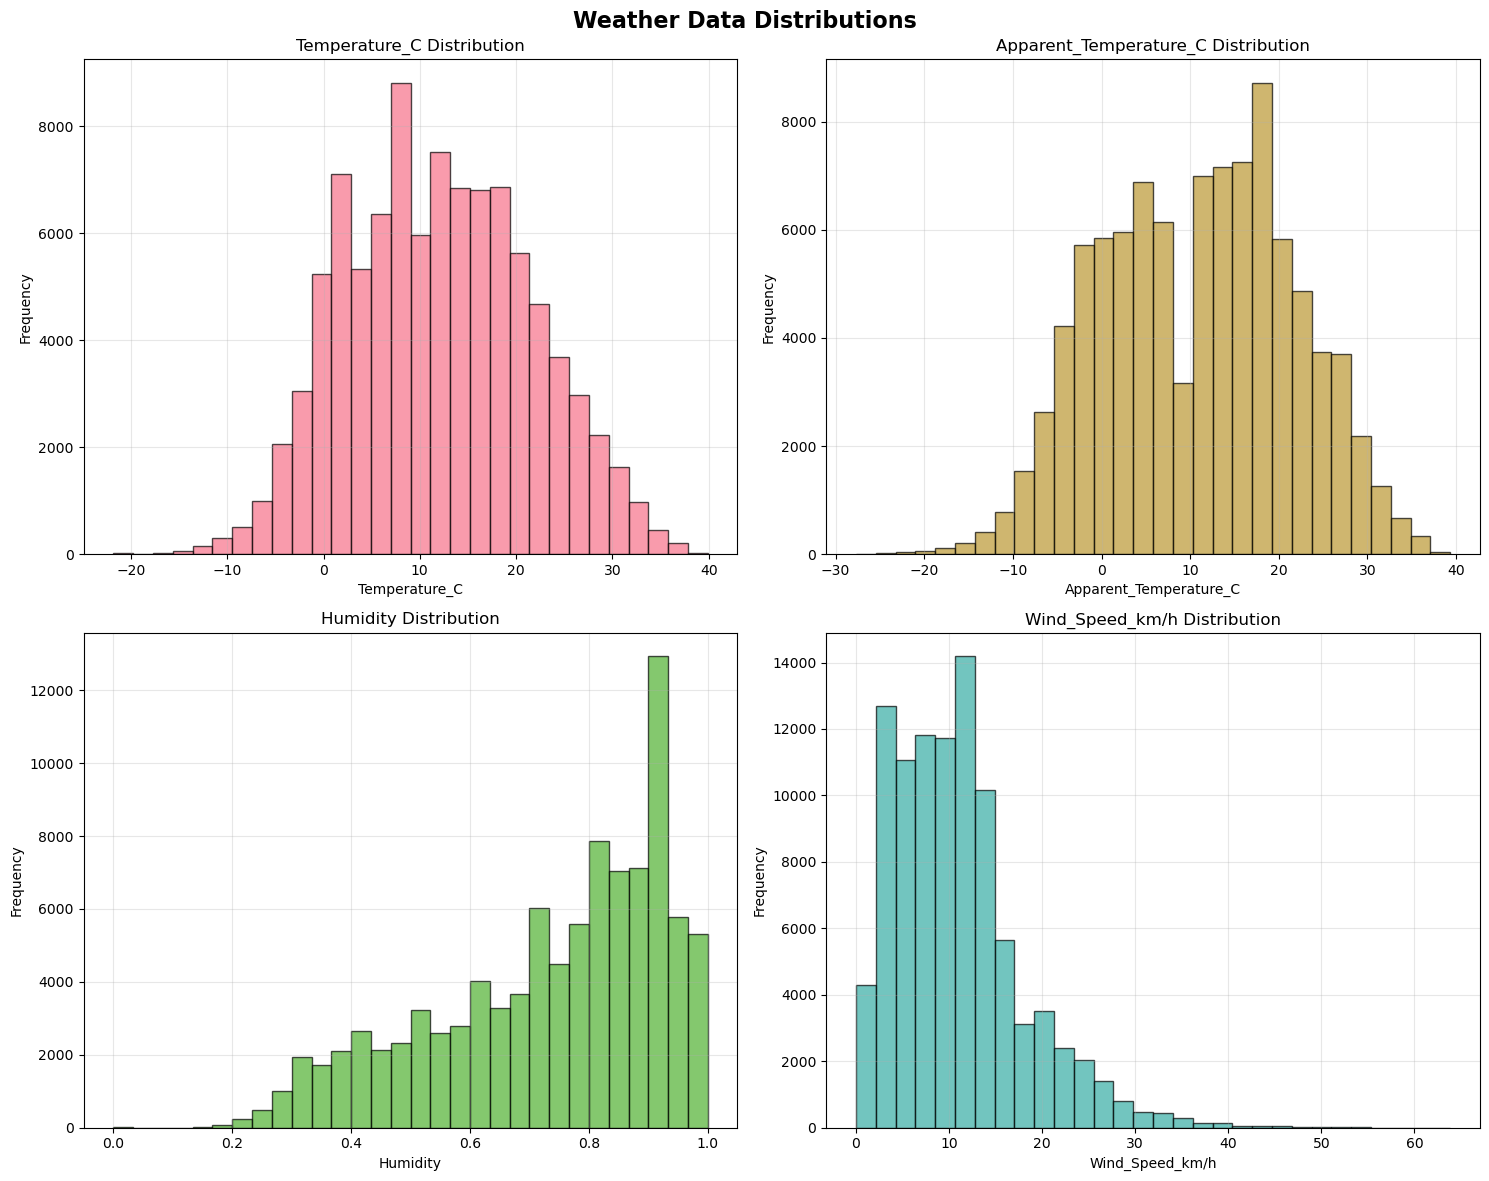

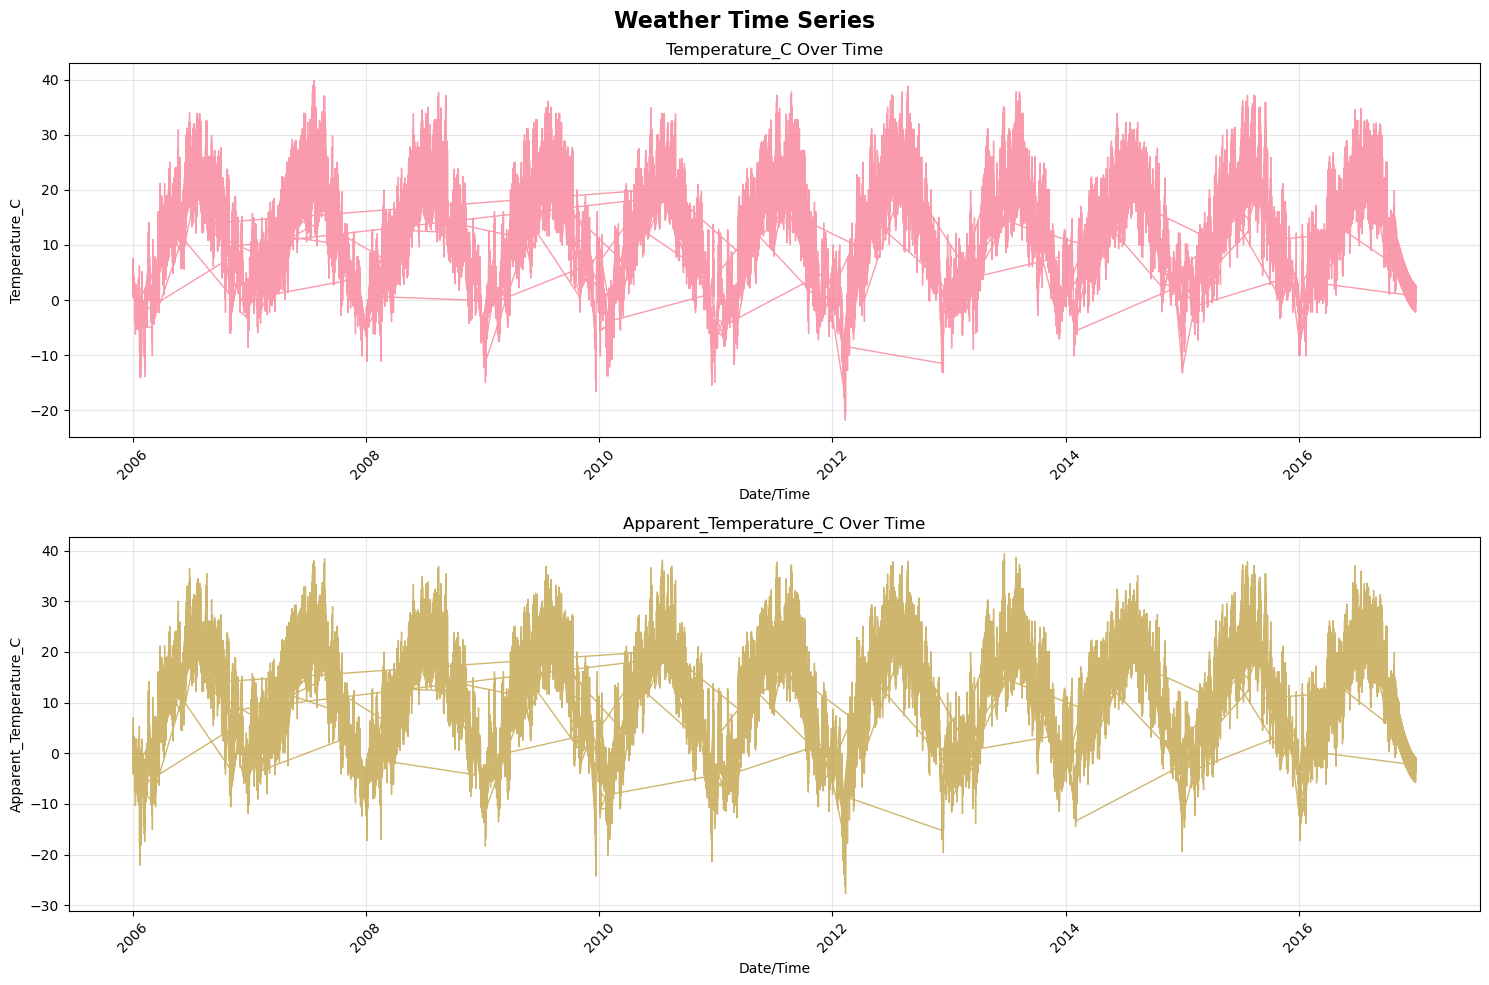

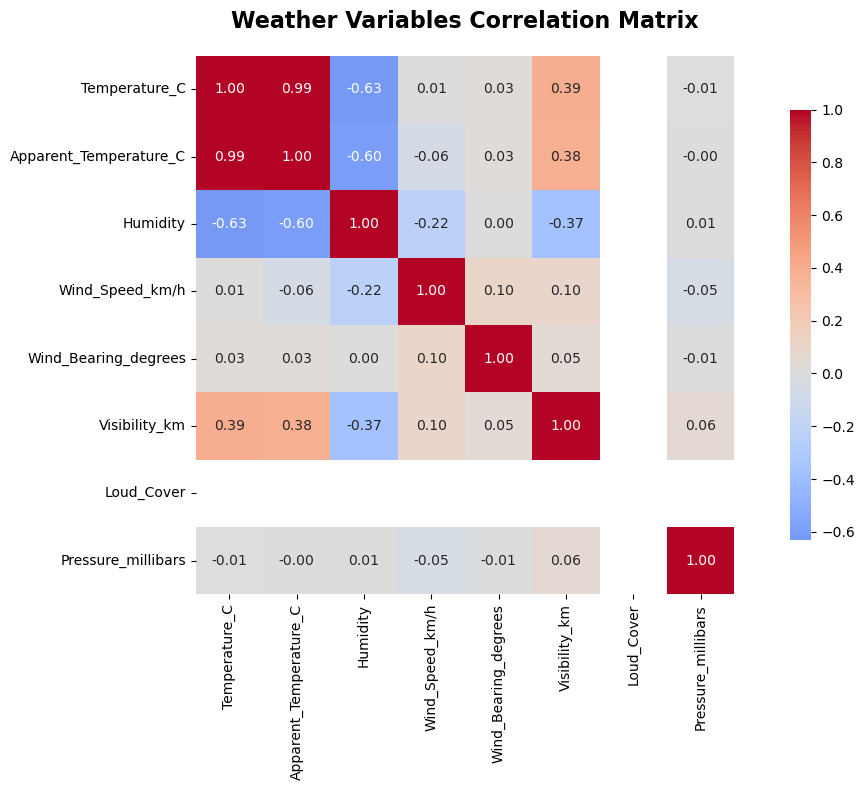

In [27]:
# Cell 8: Data Visualizations
def create_visualizations(df):
    """Create comprehensive weather visualizations"""
    print("🎨 Creating visualizations...")
    
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) == 0:
        print("No numeric columns found for visualization")
        return
    
    # Figure 1: Distribution plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Weather Data Distributions', fontsize=16, fontweight='bold')
    
    # Plot distributions for first 4 numeric columns
    for i, col in enumerate(numeric_cols[:4]):
        row = i // 2
        col_idx = i % 2
        
        axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, color=f'C{i}', edgecolor='black')
        axes[row, col_idx].set_title(f'{col} Distribution')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Frequency')
        axes[row, col_idx].grid(True, alpha=0.3)
    
    # Remove empty subplots
    for i in range(len(numeric_cols), 4):
        row = i // 2
        col_idx = i % 2
        axes[row, col_idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Figure 2: Time series plots (if datetime available)
    if 'datetime' in df.columns and len(numeric_cols) > 0:
        fig, axes = plt.subplots(2, 1, figsize=(15, 10))
        fig.suptitle('Weather Time Series', fontsize=16, fontweight='bold')
        
        # Plot first two numeric columns over time
        for i, col in enumerate(numeric_cols[:2]):
            axes[i].plot(df['datetime'], df[col], alpha=0.7, color=f'C{i}', linewidth=1)
            axes[i].set_title(f'{col} Over Time')
            axes[i].set_xlabel('Date/Time')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
            
            # Rotate x-axis labels for better readability
            axes[i].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    # Figure 3: Correlation heatmap
    if len(numeric_cols) > 1:
        plt.figure(figsize=(12, 8))
        
        # Select columns for heatmap (max 10 for readability)
        cols_for_heatmap = numeric_cols[:10]
        corr_data = df[cols_for_heatmap].corr()
        
        # Create heatmap
        sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, 
                   square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
        plt.title('Weather Variables Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()

# Create visualizations
create_visualizations(df_clean)

In [28]:
# Cell 9: Advanced Analysis
def advanced_analysis(df):
    """Perform advanced weather pattern analysis"""
    print("="*60)
    print("🔍 ADVANCED PATTERN ANALYSIS")
    print("="*60)
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Extreme value analysis
    print("\n🌟 Extreme Values Analysis:")
    for col in numeric_cols[:3]:  # Analyze first 3 numeric columns
        data = df[col].dropna()
        if len(data) > 0:
            q1 = data.quantile(0.25)
            q3 = data.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            print(f"\n{col}:")
            print(f"  Outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
            print(f"  Range: {data.min():.2f} to {data.max():.2f}")
            print(f"  IQR: {q1:.2f} to {q3:.2f}")
    
    # Monthly analysis (if date available)
    if 'month' in df.columns and len(numeric_cols) > 0:
        print("\n📅 Monthly Analysis:")
        for col in numeric_cols[:2]:  # Analyze first 2 numeric columns
            monthly_stats = df.groupby('month')[col].agg(['mean', 'min', 'max'])
            print(f"\n{col} by month:")
            for month in [1, 4, 7, 10]:  # Show seasonal months
                if month in monthly_stats.index:
                    mean_val = monthly_stats.loc[month, 'mean']
                    min_val = monthly_stats.loc[month, 'min']
                    max_val = monthly_stats.loc[month, 'max']
                    print(f"  Month {month}: avg={mean_val:.2f}, min={min_val:.2f}, max={max_val:.2f}")

# Run advanced analysis
advanced_analysis(df_clean)

🔍 ADVANCED PATTERN ANALYSIS

🌟 Extreme Values Analysis:

Temperature_C:
  Outliers: 44 (0.0%)
  Range: -21.82 to 39.91
  IQR: 4.69 to 18.84

Apparent_Temperature_C:
  Outliers: 22 (0.0%)
  Range: -27.72 to 39.34
  IQR: 2.31 to 18.84

Humidity:
  Outliers: 46 (0.0%)
  Range: 0.00 to 1.00
  IQR: 0.60 to 0.89


In [29]:
# Cell 10: Generate Report
def generate_report(df):
    """Generate comprehensive weather analysis report"""
    print("="*60)
    print("📋 WEATHER ANALYSIS REPORT")
    print("="*60)
    
    # Basic information
    print(f"Dataset: weatherHistory.csv")
    print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Records Analyzed: {len(df):,}")
    
    if 'datetime' in df.columns:
        print(f"Time Period: {df['datetime'].min()} to {df['datetime'].max()}")
        time_span = df['datetime'].max() - df['datetime'].min()
        print(f"Duration: {time_span.days} days")
    
    # Key findings
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        print("\n📊 KEY FINDINGS:")
        
        # Temperature insights (if available)
        temp_cols = [col for col in numeric_cols if 'temp' in col.lower()]
        if temp_cols:
            temp_col = temp_cols[0]
            temp_mean = df[temp_col].mean()
            temp_min = df[temp_col].min()
            temp_max = df[temp_col].max()
            print(f"• Average temperature: {temp_mean:.2f}")
            print(f"• Temperature range: {temp_min:.2f} to {temp_max:.2f}")
        
        # Humidity insights (if available)
        humidity_cols = [col for col in numeric_cols if 'humid' in col.lower()]
        if humidity_cols:
            humidity_col = humidity_cols[0]
            humidity_mean = df[humidity_col].mean()
            print(f"• Average humidity: {humidity_mean:.2f}")
        
        # Wind insights (if available)
        wind_cols = [col for col in numeric_cols if 'wind' in col.lower()]
        if wind_cols:
            wind_col = wind_cols[0]
            wind_mean = df[wind_col].mean()
            wind_max = df[wind_col].max()
            print(f"• Average wind: {wind_mean:.2f}")
            print(f"• Maximum wind: {wind_max:.2f}")
    
    # Data quality assessment
    missing_percent = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
    print(f"\n📊 DATA QUALITY:")
    print(f"• Missing data: {missing_percent:.2f}%")
    print(f"• Numeric columns: {len(numeric_cols)}")
    print(f"• Categorical columns: {len(df.select_dtypes(include=['object']).columns)}")
    
    print("\n✅ Analysis completed successfully!")

# Generate final report
generate_report(df_clean)

📋 WEATHER ANALYSIS REPORT
Dataset: weatherHistory.csv
Analysis Date: 2025-08-30 10:54:55
Records Analyzed: 96,453
Time Period: 2006-01-01 00:00:00+01:00 to 2016-12-31 23:00:00+01:00
Duration: 4017 days

📊 KEY FINDINGS:
• Average temperature: 11.93
• Temperature range: -21.82 to 39.91
• Average humidity: 0.73
• Average wind: 10.81
• Maximum wind: 63.85

📊 DATA QUALITY:
• Missing data: 0.04%
• Numeric columns: 8
• Categorical columns: 5

✅ Analysis completed successfully!


In [30]:
# Cell 11: Export Results
def export_results(df):
    """Export analysis results to files"""
    print("💾 Exporting results...")
    
    try:
        # Export cleaned data
        df.to_csv('cleaned_weather_data.csv', index=False)
        print("✅ Cleaned data exported: cleaned_weather_data.csv")
        
        # Export summary statistics
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            summary_stats = df[numeric_cols].describe()
            summary_stats.to_csv('weather_summary_stats.csv')
            print("✅ Summary statistics exported: weather_summary_stats.csv")
        
        # Export correlation matrix
        if len(numeric_cols) > 1:
            corr_matrix = df[numeric_cols].corr()
            corr_matrix.to_csv('weather_correlations.csv')
            print("✅ Correlations exported: weather_correlations.csv")
        
    except Exception as e:
        print(f"❌ Export error: {str(e)}")

# Export results
export_results(df_clean)

💾 Exporting results...
✅ Cleaned data exported: cleaned_weather_data.csv
✅ Summary statistics exported: weather_summary_stats.csv
✅ Correlations exported: weather_correlations.csv


In [31]:
# Cell 12: Interactive Data Explorer
def explore_data(df):
    """Interactive data exploration functions"""
    print("="*60)
    print("🔍 DATA EXPLORER")
    print("="*60)
    
    print("Available functions for data exploration:")
    print("• df_clean.head(n) - View first n rows")
    print("• df_clean.tail(n) - View last n rows") 
    print("• df_clean.info() - Data types and memory usage")
    print("• df_clean.describe() - Statistical summary")
    print("• df_clean.columns.tolist() - List all columns")
    print("• df_clean['column_name'].value_counts() - Count unique values")
    print("• df_clean['column_name'].hist() - Plot histogram")
    print("• df_clean.groupby('column').mean() - Group by analysis")
    
    print(f"\n📊 Quick Stats:")
    print(f"• Total rows: {len(df):,}")
    print(f"• Total columns: {len(df.columns)}")
    print(f"• Numeric columns: {len(df.select_dtypes(include=[np.number]).columns)}")
    print(f"• Text columns: {len(df.select_dtypes(include=['object']).columns)}")
    
    if 'datetime' in df.columns:
        print(f"• Date range: {df['datetime'].min()} to {df['datetime'].max()}")

# Initialize data explorer
explore_data(df_clean)

print("\n" + "="*60)
print("🎉 WEATHER ANALYSIS COMPLETE!")
print("="*60)
print("All analysis functions executed successfully!")
print("Your weatherHistory.csv data has been thoroughly analyzed.")
print("Charts, statistics, and reports have been generated.")
print("\nFiles created:")
print("• cleaned_weather_data.csv")
print("• weather_summary_stats.csv") 
print("• weather_correlations.csv")
print("\nYou can now explore your data using the functions above!")

🔍 DATA EXPLORER
Available functions for data exploration:
• df_clean.head(n) - View first n rows
• df_clean.tail(n) - View last n rows
• df_clean.info() - Data types and memory usage
• df_clean.describe() - Statistical summary
• df_clean.columns.tolist() - List all columns
• df_clean['column_name'].value_counts() - Count unique values
• df_clean['column_name'].hist() - Plot histogram
• df_clean.groupby('column').mean() - Group by analysis

📊 Quick Stats:
• Total rows: 96,453
• Total columns: 13
• Numeric columns: 8
• Text columns: 5
• Date range: 2006-01-01 00:00:00+01:00 to 2016-12-31 23:00:00+01:00

🎉 WEATHER ANALYSIS COMPLETE!
All analysis functions executed successfully!
Your weatherHistory.csv data has been thoroughly analyzed.
Charts, statistics, and reports have been generated.

Files created:
• cleaned_weather_data.csv
• weather_summary_stats.csv
• weather_correlations.csv

You can now explore your data using the functions above!
